In [1]:
import pandas as pd


In [2]:
july_fileS = "SukhumvitSalesJuly2023.csv"
august_fileS = "SukhumvitSalesAugust2023.csv"
sep_fileS = "SukhumvitSalesSeptember2023.csv"

df_julys = pd.read_csv(july_fileS)
df_augusts = pd.read_csv(august_fileS)
df_seps = pd.read_csv(sep_fileS)

In [3]:
data_frames_s = [df_julys, df_augusts, df_seps]

In [4]:
df_julys.columns

Index(['Date', 'Kaimook Cust', 'Kaimook Sales', 'Khwan Cust', 'Khwan Sales',
       'Guk Cust', 'Guk Sales', 'Pon Cust', 'Pon Sales', 'Nan Cust',
       'Nan Sales', 'Nib Cust', 'Nib Sales', 'Gookik Cust', 'Gookik Sales',
       'Pedicure Total Cust', 'Pedicure Total Sales', 'Total Cust',
       'Total Sales', 'Voucher Amount', 'TIP', 'Total Cash Amount', 'TF Doc',
       'Sales Doc', 'TF Date', 'In Charged', 'Book Bank Checked', 'เว้นไว้'],
      dtype='object')

### Sukhumvit Prediction for OCT 2023

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


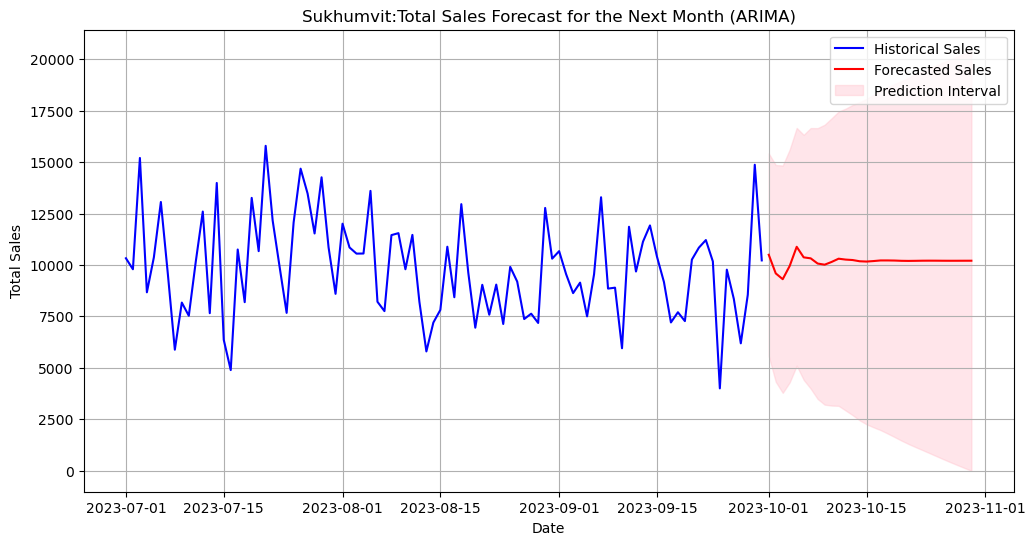

Total Sales Forecast for the Next Month (ARIMA):
            Forecasted Sales
2023-10-01      10494.783969
2023-10-02       9589.797791
2023-10-03       9307.072492
2023-10-04       9952.452739
2023-10-05      10881.952790
2023-10-06      10368.931254
2023-10-07      10320.993612
2023-10-08      10067.596467
2023-10-09      10012.259788
2023-10-10      10146.209468
2023-10-11      10303.523663
2023-10-12      10260.328721
2023-10-13      10238.603439
2023-10-14      10179.210404
2023-10-15      10164.222953
2023-10-16      10188.698309
2023-10-17      10218.289866
2023-10-18      10218.562022
2023-10-19      10213.394281
2023-10-20      10200.479695
2023-10-21      10196.153243
2023-10-22      10200.170678
2023-10-23      10206.032571
2023-10-24      10207.501911
2023-10-25      10206.583555
2023-10-26      10203.899152
2023-10-27      10202.706560
2023-10-28      10203.273116
2023-10-29      10204.444386
2023-10-30      10204.973500


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Combine the data frames
data_frames_s = [df_julys, df_augusts, df_seps]
combined_data = pd.concat(data_frames_s)

# Ensure the 'Date' column is in datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Set 'Date' as the index for time series analysis
combined_data.set_index('Date', inplace=True)

# Model Selection (ARIMA)
p = 5  # Autoregressive order
d = 1  # Differencing order
q = 0  # Moving average order

model = ARIMA(combined_data['Total Sales'], order=(p, d, q))
model_fit = model.fit()

# Forecasting only the next month
forecast_periods = 30  # Forecast for the next 30 days (approximately one month)
forecast = model_fit.get_forecast(steps=forecast_periods)

# Extract the forecasted values and prediction intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecast to a DataFrame with datetime index
forecast_dates = [combined_data.index[-1] + pd.DateOffset(days=i) for i in range(1, forecast_periods + 1)]
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_values}, index=forecast_dates)

# Extract the sales forecast for the next month
next_month_forecast = forecast_df.iloc[:30]

# Plot historical sales and the forecast for the next month
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Total Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.4, label='Prediction Interval')
plt.title('Sukhumvit:Total Sales Forecast for the Next Month (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast for the next month
print("Total Sales Forecast for the Next Month (ARIMA):")
print(next_month_forecast)


In [10]:
import numpy as np

actual_values = [9770, 8980, 6760, 10940, 9740, 8100, 9280, 8685, 8945, 8850,7910,12120,6380,6990,7140,8150,8335,9220,8280,10100,6660,3630,7770,6250,9050,9245,12735]
predicted_values = [ 10494.783969, 9589.797791,  9307.072492, 9952.452739, 10881.952790, 10368.931254, 10320.993612,10067.596467,  10012.259788,  10146.209468,
                   10303.523663,10260.328721,10238.603439,10179.210404,10164.222953,10188.698309,10218.289866,10218.562022,10213.394281,10200.479695, 10196.153243,
                    10200.170678,10206.032571,10207.501911, 10206.583555,10203.899152,10202.706560]

# Calculate the mean of actual values
mean_actual = np.mean(actual_values)

# Calculate the mean of predicted values
mean_predicted = np.mean(predicted_values)

print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

Mean of Actual Values: 8519.074074074075
Mean of Predicted Values: 10175.941162703706


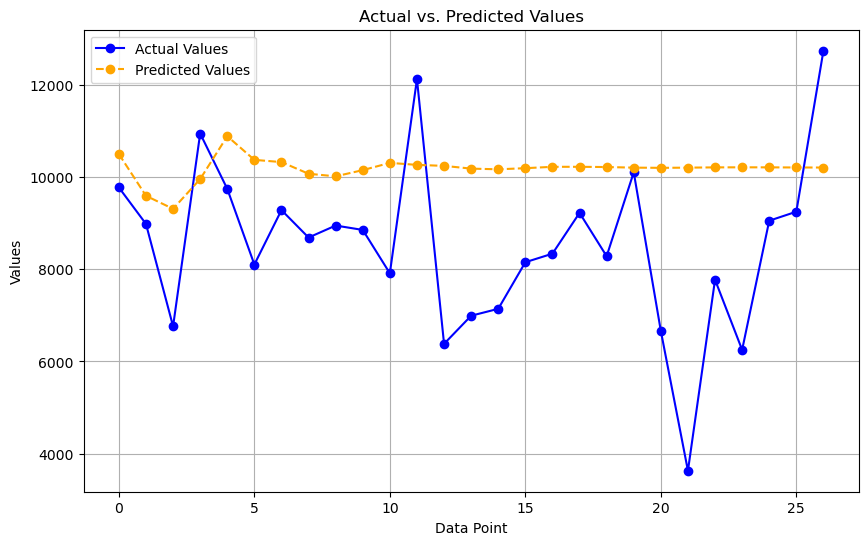

Mean of Actual Values: 8519.074074074075
Mean of Predicted Values: 10175.941162703706


In [11]:
import matplotlib.pyplot as plt

# Plot actual and predicted values in a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(predicted_values, label='Predicted Values', marker='o', linestyle='--', color='orange')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

plt.show()

print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual values and predicted values
actual_values = [9770, 8980, 6760, 10940, 9740, 8100, 9280, 8685, 8945, 8850,7910,12120,6380,6990,7140,8150,8335,9220,8280,10100,6660,3630,7770,6250,9050,9245,12735]
predicted_values = [ 10494.783969, 9589.797791,  9307.072492, 9952.452739, 10881.952790, 10368.931254, 10320.993612,10067.596467,  10012.259788,  10146.209468,
                   10303.523663,10260.328721,10238.603439,10179.210404,10164.222953,10188.698309,10218.289866,10218.562022,10213.394281,10200.479695, 10196.153243,
                    10200.170678,10206.032571,10207.501911, 10206.583555,10203.899152,10202.706560]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2055.349457518518
Mean Squared Error (MSE): 6015010.040415283
Root Mean Squared Error (RMSE): 2452.551740619407


In [ ]:
columns_of_interest =['Kaimook Sales','Khwan Sales','Guk Sales','Pon Sales','Nan Sales','Nib Sales','Gookik Sales']
      

### Total Sales/Staff

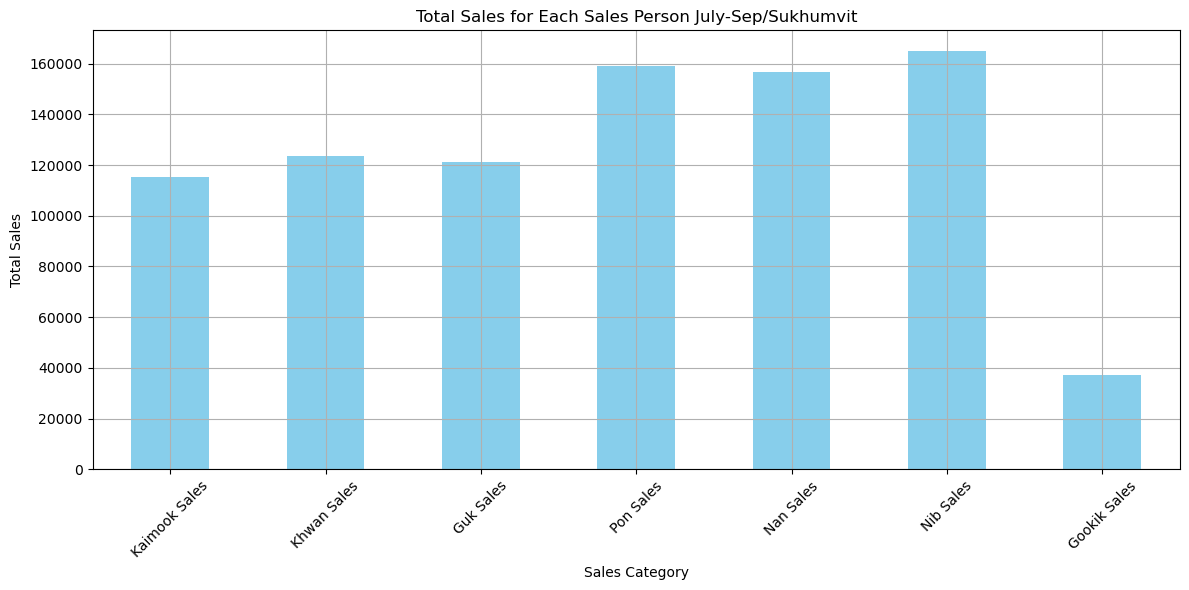

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# List of data frames for each month
data_frames_s = [df_julys, df_augusts, df_seps]

# Concatenate the data frames to combine the data
combined_data = pd.concat(data_frames_s)

# Select the columns of interest
columns_of_interest = ['Kaimook Sales','Khwan Sales','Guk Sales','Pon Sales','Nan Sales','Nib Sales','Gookik Sales']

# Extract the relevant data
sales_data = combined_data[columns_of_interest]

# Plot the data using a bar graph
sales_data.sum().plot(kind='bar', figsize=(12, 6), color='skyblue')

# Customize the plot
plt.title('Total Sales for Each Sales Person July-Sep/Sukhumvit')
plt.xlabel('Sales Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### To find the 5 dates with the highest total sales in a DataFrame

In [6]:
import pandas as pd

# Concatenate the dataframes
data_frames_s = [df_julys, df_augusts, df_seps]
combined_df = pd.concat(data_frames_s)

# Sort the dataframe by total sales in descending order
sorted_df = combined_df.sort_values(by='Total Sales', ascending=False)

# Get the first 5 dates with the highest total sales
top_5_dates = sorted_df['Date'].head(5)

# Display the top 5 dates
top_5_dates

20         July 21, 2023
2           July 3, 2023
28    September 29, 2023
25         July 26, 2023
28         July 29, 2023
Name: Date, dtype: object

In [7]:
# Sort df_julys by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_julys.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Kaimook Cust,Kaimook Sales,Khwan Cust,Khwan Sales,Guk Cust,Guk Sales,Pon Cust,Pon Sales,Nan Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,TF Doc,Sales Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
20,"July 21, 2023",5,2810,0,0,5,2100,6,3000,7,...,15790,250,50,15490,NaN,NaN,NaN,NaN,No,NaN
2,"July 3, 2023",4,2150,6,2280,9,3750,0,0,8,...,15200,250,0,14950,NaN,NaN,NaN,NaN,No,NaN
25,"July 26, 2023",4,3380,5,2320,0,0,8,3220,7,...,14680,0,130,14550,NaN,NaN,NaN,NaN,No,NaN
28,"July 29, 2023",4,2690,7,2530,4,2670,6,2650,0,...,14260,250,0,13910,NaN,NaN,NaN,NaN,No,NaN
13,"July 14, 2023",0,0,5,2690,5,2090,5,2200,5,...,13985,250,0,13735,NaN,NaN,NaN,NaN,No,NaN


In [8]:
# Sort df_augusts by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_augusts.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Kaimook Cust,Kaimook Sales,Khwan Cust,Khwan Sales,Guk Cust,Guk Sales,Pon Cust,Pon Sales,Nan Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,TF Doc,Sales Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
4,"August 5, 2023",0,0,6,3210,0,0,6,3490,8,...,13600,0,0,13600,NaN,NaN,NaN,NaN,No,NaN
17,"August 18, 2023",3,1450,6,2270,6,2450,6,2800,5,...,12955,500,100,12355,NaN,NaN,NaN,NaN,No,NaN
29,"August 30, 2023",6,4010,0,0,6,1990,0,0,5,...,12770,250,100,12420,NaN,NaN,NaN,NaN,No,NaN
0,"August 1, 2023",3,1450,6,2885,6,2130,0,0,6,...,12005,0,0,12005,NaN,NaN,NaN,NaN,No,NaN
8,"August 9, 2023",0,0,0,0,4,2000,0,0,1,...,11545,250,0,11295,NaN,NaN,NaN,NaN,No,NaN


In [9]:
# Sort df_seps by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_seps.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Kaimook Cust,Kaimook Sales,Khwan Cust,Khwan Sales,Guk Cust,Guk Sales,Pon Cust,Pon Sales,Nan Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,TF Doc,Sales Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
28,"September 29, 2023",9,3700,6,2240,0,0,9,4300,5,...,14870,500,0,14370,NaN,NaN,NaN,NaN,No,NaN
6,"September 7, 2023",6,1490,0,0,6,3350,6,2500,8,...,13290,500,90,12700,NaN,NaN,NaN,NaN,No,NaN
13,"September 14, 2023",5,2010,0,0,4,1500,6,2900,7,...,11920,100,0,11820,NaN,NaN,NaN,NaN,No,NaN
10,"September 11, 2023",4,2985,3,1850,5,1550,5,2970,0,...,11855,750,100,11005,NaN,NaN,NaN,NaN,No,NaN
21,"September 22, 2023",5,1980,0,0,6,2060,8,3520,7,...,11210,500,100,10610,NaN,NaN,NaN,NaN,No,NaN


## Scatter plot show relationship between day and total sale of the day across 3 months

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


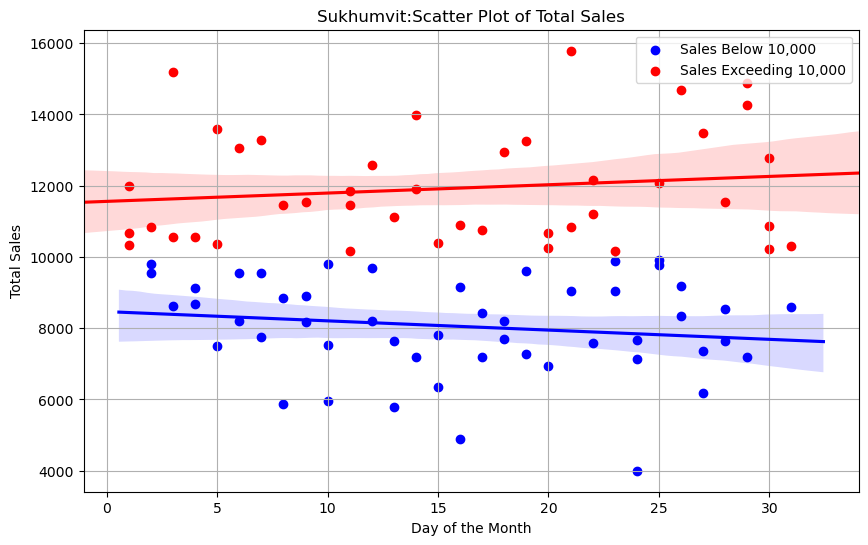

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Concatenate the dataframes
data_frames_s = [df_julys, df_augusts, df_seps]
combined_df = pd.concat(data_frames_s)

# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Create a scatter plot to differentiate total sales
plt.figure(figsize=(10, 6))

# Filter data for sales below 10,000
below_10000 = combined_df[combined_df['Total Sales'] < 10000]
below_10000['Day'] = below_10000['Date'].dt.day  # Extract the day of the month
plt.scatter(below_10000['Day'], below_10000['Total Sales'], label='Sales Below 10,000', color='blue')

# Fit a regression line for the "Sales Below 10,000" group
sns.regplot(x='Day', y='Total Sales', data=below_10000, scatter=False, color='blue')

# Filter data for sales exceeding 10,000
exceed_10000 = combined_df[combined_df['Total Sales'] > 10000]
exceed_10000['Day'] = exceed_10000['Date'].dt.day  # Extract the day of the month
plt.scatter(exceed_10000['Day'], exceed_10000['Total Sales'], label='Sales Exceeding 10,000', color='red')

# Fit a regression line for the "Sales Exceeding 10,000" group
sns.regplot(x='Day', y='Total Sales', data=exceed_10000, scatter=False, color='red')

plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.title('Sukhumvit:Scatter Plot of Total Sales')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


## Sukhumvit July-Sep: Bar Plot of Total Sales by Day of the Week

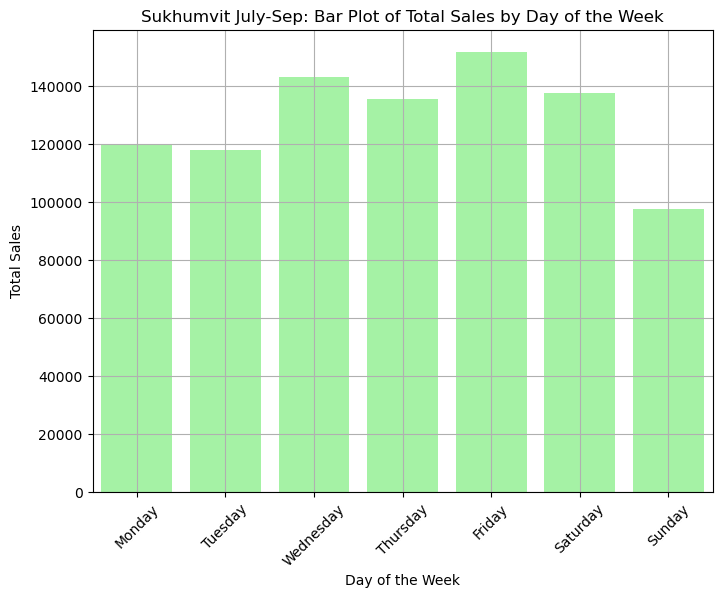

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the DataFrames into one
data_frames_s = [df_julys, df_augusts, df_seps]
combined_df = pd.concat(data_frames_s)

# Convert the 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the day of the week from the 'Date' column
combined_df['day_of_week'] = combined_df['Date'].dt.day_name()

# Group the data by 'day_of_week' and calculate the total sales for each day
daily_sales = combined_df.groupby('day_of_week')['Total Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Create a bar plot using Seaborn 
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_week', y='Total Sales', data=daily_sales, color='#98FF98')  
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.title('Sukhumvit July-Sep: Bar Plot of Total Sales by Day of the Week')
plt.grid(True)

# Show the plot
plt.show()
